In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bifurcation import bifurcation_point, draw_bifurcation

184
           total_agents            60
0        number_of_cues      2.000000
1   informed_group_size     30.000000
2        num_replicates   1000.000000
3         num_timesteps  10000.000000
4         time step_inc      0.100000
5      angular_error_sd      0.000000
6      max_turning_rate      2.000000
7                 speed      1.000000
8                  beta      1.000000
9        angular_thresh      0.593412
10            set_omega      0.300000
11            omega_inc      0.012000
12            omega_dec      0.000800
13            omega_max      0.400000
14            max_angle      1.047198
[0.6576844705796087, 0.6579843612022614, 0.6646106848749269, 0.6646800861846901, 0.6847454512703156, 0.671576348573002, 0.6918952303009436, 0.7207528143028513, 0.7434600230843476, 0.7750780090402386, 0.7839089303746426, 0.7846779084365922, 0.7685473750577603, 0.8025173668791538, 0.8204777650085274, 0.8297997739848326, 0.8483186321134799, 0.8677644602386344, 0.8681388399524269, 0.868617

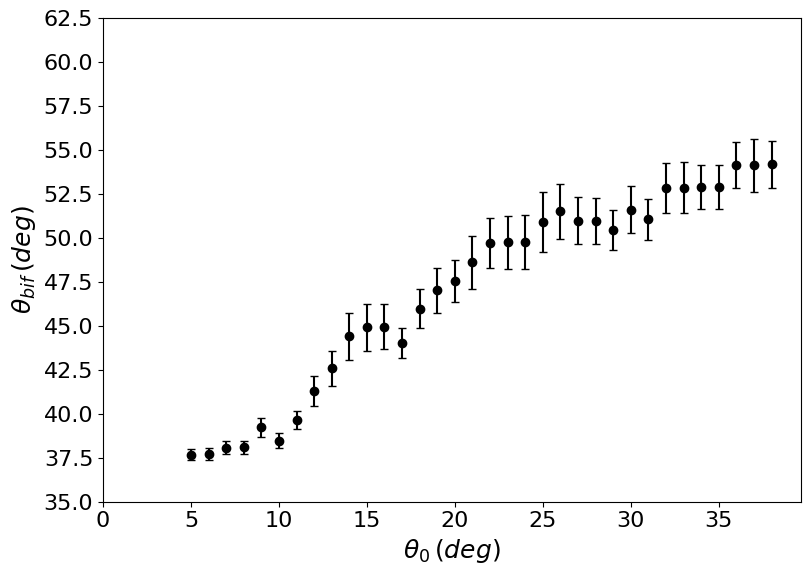

In [41]:
fig, ax = plt.subplots(figsize=(9,7))

num_reached = []

for i in range(5,37):
    df_cen = pd.read_csv(f'../output/bif_over_angthresh/centroid_{i}deg.txt', sep='\t')
    num_reached.append(len(df_cen[df_cen['cue_reached']!=-1].replicate.unique()))
print(min(num_reached))

ang_thresh = []
bif_point =[]
std = []
df_tar = pd.read_csv('../output/bif_over_angthresh/targets_5deg.txt', sep='\t')
df_par = pd.read_csv('../output/bif_over_angthresh/parameters_34deg.txt', sep='\t')

#print parameters
print(df_par)
    
for i in range(5,39,1):
    df_cen = pd.read_csv(f'../output/bif_over_angthresh/centroid_{i}deg.txt', sep='\t')
    reached = df_cen[df_cen['cue_reached']!=-1].replicate.head(min(num_reached))
    df_cen = df_cen[df_cen.replicate.isin(reached)]
    ang_thresh.append(i)
    x, s = bifurcation_point(df_cen)
    bif_point.append(x)
    std.append(s)
    

tar_x = df_tar.loc[df_tar['id'] == 0, 'x'].iloc[0]
tar_y = df_tar.loc[df_tar['id'] == 0, 'y'].iloc[0]
bif_point[:] = [x / tar_x for x in bif_point]
std[:] = [x / tar_x for x in std]

ang_crit = [np.arctan(tar_y/(tar_x-tar_x*x)) for x in bif_point]
print(ang_crit)

# Plot the data points with error bars
ax.errorbar(ang_thresh, np.degrees(ang_crit), yerr=np.degrees(std), fmt='o', capsize=3, color='black')

# set x and y ticks size
plt.xticks(np.arange(0, 40, 5), size=16)
plt.yticks(np.arange(35, 65, 2.5), size=16)


# plt.yticks(np.arange(0, 0.6, 0.1), size=12)
plt.xlabel(r'$\theta_0 \, (deg)$', size=18)
plt.ylabel(r'$\theta_{bif} \, (deg)$', size=18)

#set same scale on x and y axis
ax.set_aspect('equal', 'box')

/home/eleonora/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


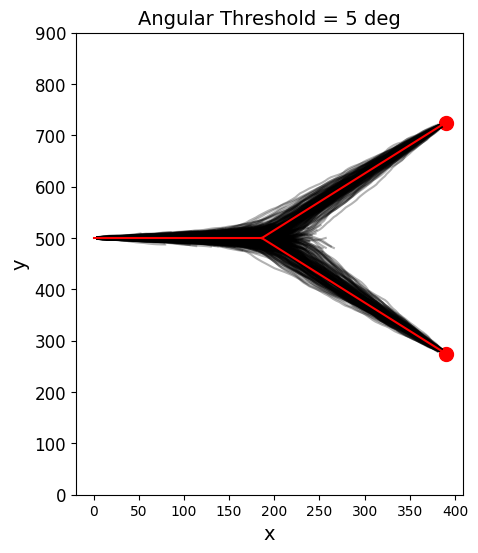

In [5]:
# draw bifurcation diagram for 5 deg
df_cen = pd.read_csv('../output/bif_over_angthresh/centroid_34deg.txt', sep='\t')

fig, ax = plt.subplots(figsize=(5,6))
draw_bifurcation(df_cen, df_tar, ax)
plt.yticks(np.arange(0, 1000, 100), size=12)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.title('Angular Threshold = 5 deg', size=14);

plt.show()